In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt

In [2]:
rows = []
with open('steam_games (2).json', 'r') as f:
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

df = pd.DataFrame(rows)

In [3]:
#df

In [4]:
#veamos las variables categoricas y despues las numericas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   discount_price  225 non-null    float64
 8   reviews_url     32133 non-null  object 
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  bool   
 12  id              32133 non-null  object 
 13  developer       28836 non-null  object 
 14  sentiment       24953 non-null  object 
 15  metascore       2677 non-null   object 
dtypes: bool(1), float64(1), object(14)
memory usage: 3.7+ MB


**LIMPIEZA DE DATOS**

1. se empieza la transformacion de cada columna.

Al final de este proceso de limpieza deberiamos tener un set de datos integros, listo para la fase de Analisis Exploratorio.

In [5]:
#Publisher

df['publisher']=df['publisher'].astype('str')
df['publisher'].replace(to_replace='nan', value='null', inplace=True)
df['publisher'].replace(to_replace='N/A', value='null', inplace=True)
df['publisher'].replace(to_replace='NA', value='null', inplace=True)

In [6]:
#df

In [7]:
#Genres

df.loc[df['genres'].isna()== True]
df['genres']=df['genres'].astype('str')
df['genres'].replace(to_replace='NaN', value='null', inplace=True)
df['genres'].replace(to_replace='', value='null', inplace=True)
df['genres'].replace(to_replace='[', value='', inplace=True)
df['genres'].replace(to_replace=']', value='', inplace=True)

In [8]:
#df

In [9]:
#app_name

df['app_name']=df['app_name'].astype('str')
df['app_name'].replace(to_replace= 'nan' , value='null', inplace=True)

In [10]:
#df

Similitudes entre 'app_name' y 'title', se reemplazan los registros 'null' de app_name por los de 'title'. Primero filtro los 'no_info


**Conclusion**: 
Los registros 'null' de 'app name', son 'NaN' en 'title'.

In [11]:
df.loc[df['app_name'] == 'null']

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
74,null,nan,null,NaN,http://store.steampowered.com/,NaN,NaN,14.99,NaN,NaN,19.99,False,NaN,NaN,NaN,NaN
2580,null,"['Action', 'Indie']",null,NaN,http://store.steampowered.com/app/317160/_/,2014-08-26,"[Action, Indie]",NaN,http://steamcommunity.com/app/317160/reviews/?...,"[Single-player, Game demo]",NaN,False,317160,NaN,Positive,NaN


In [12]:
#Title

df['title']=df['title'].astype('str')
df['title'].replace(to_replace= 'nan' , value='null', inplace=True)

In [13]:
df.loc[df['app_name'] != df['title']]


,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
4,null,nan,Log Challenge,null,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN
11,null,nan,Icarus Six Sixty Six,null,http://store.steampowered.com/app/724910/Icaru...,NaN,[Casual],NaN,http://steamcommunity.com/app/724910/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",Free,False,724910,NaN,NaN,NaN
19,null,nan,After Life VR,null,http://store.steampowered.com/app/772590/After...,NaN,"[Early Access, Indie, VR]",NaN,http://steamcommunity.com/app/772590/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",4.99,True,772590,NaN,NaN,NaN
20,null,nan,Kitty Hawk,null,http://store.steampowered.com/app/640250/Kitty...,NaN,"[Early Access, Action, Adventure, Indie, Casual]",1.97,http://steamcommunity.com/app/640250/reviews/?...,"[Single-player, Steam Leaderboards, HTC Vive, ...",2.99,True,640250,NaN,NaN,NaN
22,null,nan,Mortars VR,null,http://store.steampowered.com/app/711440/Morta...,NaN,"[Early Access, Strategy, Action, Indie, Casual...",0.89,http://steamcommunity.com/app/711440/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.99,True,711440,NaN,8 user reviews,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32073,null,nan,Tank of War-VR,null,http://store.steampowered.com/app/745900/Tank_...,NaN,"[Action, Massively Multiplayer, Strategy, VR, ...",NaN,http://steamcommunity.com/app/745900/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",19.99,False,745900,NaN,3 user reviews,NaN
32076,null,nan,Flappy Arms,null,http://store.steampowered.com/app/764110/Flapp...,NaN,"[Casual, Simulation, VR, Funny, Colorful, Come...",1.49,http://steamcommunity.com/app/764110/reviews/?...,"[Single-player, Steam Leaderboards, HTC Vive, ...",1.99,False,764110,NaN,3 user reviews,NaN
32077,null,nan,SpaceWalker,null,http://store.steampowered.com/app/705860/Space...,NaN,"[Early Access, Casual]",NaN,http://steamcommunity.com/app/705860/reviews/?...,"[Single-player, HTC Vive, Oculus Rift, Tracked...",Free,True,705860,NaN,2 user reviews,NaN
32085,null,nan,LIV Client,null,http://store.steampowered.com/app/755540/LIV_C...,NaN,"[Video Production, Utilities, Web Publishing]",NaN,http://steamcommunity.com/app/755540/reviews/?...,"[Steam Workshop, Steam Cloud, HTC Vive, Oculus...",NaN,False,755540,NaN,NaN,NaN


**TITLE > APP_NAME**

In [14]:
df.loc[(df['title']!= 'null') & (df['title'] != df['app_name'])]
df.loc[(df['title'].isna() != True) & (df['title'] != df['app_name'])]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
4,null,nan,Log Challenge,null,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN
11,null,nan,Icarus Six Sixty Six,null,http://store.steampowered.com/app/724910/Icaru...,NaN,[Casual],NaN,http://steamcommunity.com/app/724910/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",Free,False,724910,NaN,NaN,NaN
19,null,nan,After Life VR,null,http://store.steampowered.com/app/772590/After...,NaN,"[Early Access, Indie, VR]",NaN,http://steamcommunity.com/app/772590/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",4.99,True,772590,NaN,NaN,NaN
20,null,nan,Kitty Hawk,null,http://store.steampowered.com/app/640250/Kitty...,NaN,"[Early Access, Action, Adventure, Indie, Casual]",1.97,http://steamcommunity.com/app/640250/reviews/?...,"[Single-player, Steam Leaderboards, HTC Vive, ...",2.99,True,640250,NaN,NaN,NaN
22,null,nan,Mortars VR,null,http://store.steampowered.com/app/711440/Morta...,NaN,"[Early Access, Strategy, Action, Indie, Casual...",0.89,http://steamcommunity.com/app/711440/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.99,True,711440,NaN,8 user reviews,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32073,null,nan,Tank of War-VR,null,http://store.steampowered.com/app/745900/Tank_...,NaN,"[Action, Massively Multiplayer, Strategy, VR, ...",NaN,http://steamcommunity.com/app/745900/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",19.99,False,745900,NaN,3 user reviews,NaN
32076,null,nan,Flappy Arms,null,http://store.steampowered.com/app/764110/Flapp...,NaN,"[Casual, Simulation, VR, Funny, Colorful, Come...",1.49,http://steamcommunity.com/app/764110/reviews/?...,"[Single-player, Steam Leaderboards, HTC Vive, ...",1.99,False,764110,NaN,3 user reviews,NaN
32077,null,nan,SpaceWalker,null,http://store.steampowered.com/app/705860/Space...,NaN,"[Early Access, Casual]",NaN,http://steamcommunity.com/app/705860/reviews/?...,"[Single-player, HTC Vive, Oculus Rift, Tracked...",Free,True,705860,NaN,2 user reviews,NaN
32085,null,nan,LIV Client,null,http://store.steampowered.com/app/755540/LIV_C...,NaN,"[Video Production, Utilities, Web Publishing]",NaN,http://steamcommunity.com/app/755540/reviews/?...,"[Steam Workshop, Steam Cloud, HTC Vive, Oculus...",NaN,False,755540,NaN,NaN,NaN


Las diferencias vienen de que en la columna 'title' despues del & le sigue un 'amp;'. Error de compilacion o de formatos. Para verificarlo, evidenciar cuantos registros de la columna 'title' contienen un '&'.

In [15]:
df.loc[df['title'].str.contains('&', regex=True)]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
80,Telltale Games,"['Action', 'Adventure']",Sam & Max 101: Culture Shock,Sam &amp; Max 101: Culture Shock,http://store.steampowered.com/app/8200/Sam__Ma...,2006-10-17,"[Point & Click, Comedy, Adventure, Detective, ...",NaN,http://steamcommunity.com/app/8200/reviews/?br...,[Single-player],19.99,False,8200,Telltale Games,Very Positive,NaN
83,Telltale Games,"['Action', 'Adventure']",Sam & Max 102: Situation: Comedy,Sam &amp; Max 102: Situation: Comedy,http://store.steampowered.com/app/8210/Sam__Ma...,2006-12-20,"[Adventure, Action]",NaN,http://steamcommunity.com/app/8210/reviews/?br...,[Single-player],19.99,False,8210,Telltale Games,Positive,NaN
109,Electronic Arts,['Strategy'],Command & Conquer: Red Alert 3,Command &amp; Conquer: Red Alert 3,http://store.steampowered.com/app/17480/Comman...,2008-10-28,"[Strategy, RTS, Base Building, Multiplayer, Co...",NaN,http://steamcommunity.com/app/17480/reviews/?b...,[Single-player],19.99,False,17480,EA Los Angeles,Very Positive,82
182,Ubisoft,['Strategy'],Heroes of Might & Magic V: Hammers of Fate,Heroes of Might &amp; Magic V: Hammers of Fate,http://store.steampowered.com/app/15380/Heroes...,2006-11-14,"[Strategy, Turn-Based Strategy, Turn-Based, Fa...",NaN,http://steamcommunity.com/app/15380/reviews/?b...,[Single-player],9.99,False,15380,Nival,Mostly Positive,66
184,Ubisoft,['Strategy'],Heroes of Might & Magic V: Tribes of the East,Heroes of Might &amp; Magic V: Tribes of the East,http://store.steampowered.com/app/15370/Heroes...,2007-10-16,"[Strategy, Turn-Based Strategy, Turn-Based, Fa...",NaN,http://steamcommunity.com/app/15370/reviews/?b...,[Single-player],9.99,False,15370,Nival,Very Positive,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31871,Telltale Games,"['Action', 'Adventure']",Sam & Max 105: Reality 2.0,Sam &amp; Max 105: Reality 2.0,http://store.steampowered.com/app/8240/Sam__Ma...,2007-03-29,"[Adventure, Action]",NaN,http://steamcommunity.com/app/8240/reviews/?br...,[Single-player],19.99,False,8240,Telltale Games,Positive,NaN
31872,Telltale Games,"['Action', 'Adventure']",Sam & Max 104: Abe Lincoln Must Die!,Sam &amp; Max 104: Abe Lincoln Must Die!,http://store.steampowered.com/app/8230/Sam__Ma...,2007-02-22,"[Adventure, Action, Point & Click, Free to Pla...",NaN,http://steamcommunity.com/app/8230/reviews/?br...,[Single-player],19.99,False,8230,Telltale Games,8 user reviews,NaN
31873,Telltale Games,"['Action', 'Adventure']",Sam & Max 106: Bright Side of the Moon,Sam &amp; Max 106: Bright Side of the Moon,http://store.steampowered.com/app/8250/Sam__Ma...,2007-04-26,"[Adventure, Action]",NaN,http://steamcommunity.com/app/8250/reviews/?br...,[Single-player],19.99,False,8250,Telltale Games,Positive,NaN
31898,Strategy First,"['Action', 'Strategy']",Making History: The Calm & the Storm,Making History: The Calm &amp; the Storm,http://store.steampowered.com/app/6250/Making_...,2007-03-13,"[Strategy, Action, Turn-Based Strategy, Grand ...",NaN,http://steamcommunity.com/app/6250/reviews/?br...,"[Single-player, Multi-player]",4.99,False,6250,Muzzy Lane,Very Positive,70


**Se elimina la columna**.

la diferencia entre 'title' y 'app_name' no es por un NaN, ni por el error del '&amp'. 

In [16]:
df=df.drop(['title'], axis=1)

In [17]:
#pd.isnull(df).sum()

**release_date**

Se realizan cambios en los tipos de dato, luego se cambian algunos de los valores que no son del tipo año-mes-dia.

In [18]:
df['release_date']=df['release_date'].astype(str)
df['release_date'].replace(to_replace='0000-01-01', value= '2014-03-01', inplace=True)
df['release_date'].replace(to_replace='Soon..', value= '1999-01-01', inplace=True)
df['release_date'].replace(to_replace='Beta测试已开启', value= '2000-01-01', inplace=True)
df['release_date'].replace(to_replace='Jun 2009', value= '2009-06-01', inplace=True)
df['release_date'].replace(to_replace='Oct 2010', value= '2010-10-01', inplace=True)
df['release_date'].replace(to_replace='Feb 2011', value= '2011-02-01', inplace=True)
df['release_date'].replace(to_replace='Aug 2014', value= '2014-08-01', inplace=True)
df['release_date'].replace(to_replace='Sep 2014', value= '2014-09-01', inplace=True)
df['release_date'].replace(to_replace='Apr 2015', value= '2015-04-01', inplace=True)
df['release_date'].replace(to_replace='Apr 2016', value= '2016-04-01', inplace=True)
df['release_date'].replace(to_replace='Jul 2016', value= '2016-07-01', inplace=True)
df['release_date'].replace(to_replace='June 2016', value= '2016-05-01', inplace=True)
df['release_date'].replace(to_replace='Coming Soon', value= '1988-01-01', inplace=True)
df['release_date'].replace(to_replace='Q2 2017', value= '2017-04-01', inplace=True)
df['release_date'].replace(to_replace='TBA', value= '2021-01-01', inplace=True)
df['release_date'].replace(to_replace= "When it's", value= '2022-01-01', inplace=True)
df['release_date'].replace(to_replace= "coming soon", value= '1890-01-01', inplace=True)

In [19]:
df['release_date']=pd.to_datetime(df['release_date'], errors= 'coerce', format= '%Y/%m/%d')

In [20]:
df['release_date']=df['release_date'].astype('str')
df['release_date'].replace(to_replace= 'NaT', value= '1900-01-01', inplace=True)

In [21]:
df['release_date']=pd.to_datetime(df['release_date'], errors= 'coerce', format= '%Y/%m/%d')

In [22]:
pd.isnull(df).sum()

publisher             0
genres                0
app_name              0
url                   0
release_date          0
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29458
dtype: int64

**ANEXAMOS COLUMNA "YEAR"**

In [23]:
df.insert(loc=5, column='Year', value=2) 
df['Year'] = df['release_date'].dt.strftime('%Y')

In [24]:
df["Year"] = df["Year"].astype(int)
df=df[df['Year'] > 1980]

In [25]:
#df

**DISCOUNT PRICE**

In [26]:
df['discount_price']=df['discount_price'].replace(to_replace=np.nan , value=0)	

**REVIEWS_URL**

In [27]:
df['reviews_url']=df['reviews_url'].astype('str')

#pd.isnull(juegos).sum()
df['reviews_url'].replace(to_replace= 'nan', value= 'no_info', inplace=True)
#juegos.loc[juegos['reviews_url'] == 'no_info']

### **Price**

Se remplazan valores no numéricos (por ej, 'Free To Play) con 0. 

De esta manera en un futuro para predecir el price del df, se tomarán los valores > 0.

In [28]:
df['price'].replace(to_replace='Free To Play', value=pd.NA, inplace=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].fillna(0, inplace=True)
df.info()
pd.isnull(df).sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29888 entries, 0 to 32133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   publisher       29888 non-null  object        
 1   genres          29888 non-null  object        
 2   app_name        29888 non-null  object        
 3   url             29888 non-null  object        
 4   release_date    29888 non-null  datetime64[ns]
 5   Year            29888 non-null  int32         
 6   tags            29727 non-null  object        
 7   discount_price  29888 non-null  float64       
 8   reviews_url     29888 non-null  object        
 9   specs           29219 non-null  object        
 10  price           29888 non-null  float64       
 11  early_access    29888 non-null  bool          
 12  id              29887 non-null  object        
 13  developer       28642 non-null  object        
 14  sentiment       23133 non-null  object        
 15  me

publisher             0
genres                0
app_name              0
url                   0
release_date          0
Year                  0
tags                161
discount_price        0
reviews_url           0
specs               669
price                 0
early_access          0
id                    1
developer          1246
sentiment          6755
metascore         27269
dtype: int64

**ID**

In [29]:
df['id']=df['id'].astype('str')

df['id'].replace(to_replace= 'nan', value= '0', inplace=True)
df['id'] = pd.to_numeric(df['id'], errors='coerce')

In [30]:
#pd.isnull(df).sum()

**DEVELOPER**

In [31]:
df['developer']=df['developer'].astype('str')
df['developer'].replace(to_replace= 'nan', value= 'no_info', inplace=True)
pd.isnull(df).sum()

publisher             0
genres                0
app_name              0
url                   0
release_date          0
Year                  0
tags                161
discount_price        0
reviews_url           0
specs               669
price                 0
early_access          0
id                    0
developer             0
sentiment          6755
metascore         27269
dtype: int64

In [32]:
#df

**SENTIMENT**

In [33]:
#df['sentiment']=df['sentiment'].astype('str')
#df['sentiment'].replace(to_replace= 'nan', value= 'no_info', inplace=True)
#df

**METASCORE**

Segun los datos lanzados, se puede llegar a la conclusion que gran parte de esos datos son irrelevantes.

In [34]:
df['metascore']=df['metascore'].astype('str')
df['metascore'].replace(to_replace= 'nan', value= 'no_info', inplace=True)

In [35]:
#df

**DATA FRAME CLEAN**

**EDA**

Analisis Exploratorio

In [ ]:
# Muestra las primeras filas del DataFrame
df.head()

,publisher,genres,app_name,url,release_date,Year,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,2018,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,no_info
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,2018,"[Free to Play, Strategy, Indie, RPG, Card Game...",0.00,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,643980,Secret Level SRL,Mostly Positive,no_info
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,2017,"[Free to Play, Simulation, Sports, Casual, Ind...",0.00,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,670290,Poolians.com,Mostly Positive,no_info
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,2017,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,no_info
5,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,2018,"[Action, Adventure, Simulation, FPS, Shooter, ...",0.00,http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd,Mixed,no_info


In [ ]:
# Muestra información general sobre los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29888 entries, 0 to 32133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   publisher       29888 non-null  object        
 1   genres          29888 non-null  object        
 2   app_name        29888 non-null  object        
 3   url             29888 non-null  object        
 4   release_date    29888 non-null  datetime64[ns]
 5   Year            29888 non-null  int32         
 6   tags            29727 non-null  object        
 7   discount_price  29888 non-null  float64       
 8   reviews_url     29888 non-null  object        
 9   specs           29219 non-null  object        
 10  price           29888 non-null  float64       
 11  early_access    29888 non-null  bool          
 12  id              29888 non-null  int64         
 13  developer       29888 non-null  object        
 14  sentiment       23133 non-null  object        
 15  me

In [ ]:
# Estadísticas básicas de las columnas numéricas
df.describe()

,Year,discount_price,price,id
count,29888.000000,29888.000000,29888.000000,2.988800e+04
mean,2014.745650,0.086038,8.522091,4.431604e+05
std,3.568808,1.824529,15.924413,1.839077e+05
min,1981.000000,0.000000,0.000000,0.000000e+00
25%,2014.000000,0.000000,1.990000,3.212825e+05
50%,2016.000000,0.000000,4.990000,4.371500e+05
75%,2017.000000,0.000000,9.990000,5.877475e+05
max,2021.000000,139.990000,995.000000,2.028850e+06


**DATA VISUALIZATION**

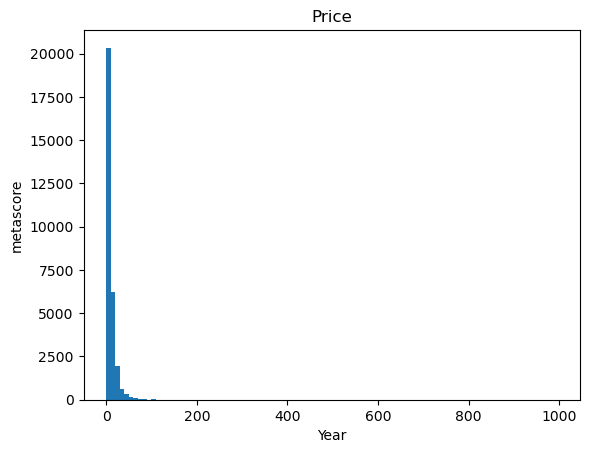

In [ ]:
plt.hist(df['price'], bins=100)
plt.xlabel('Year')
plt.ylabel('metascore')
plt.title('Price')
plt.show()

**Gráfico de dispersión (relacion entre variables)**

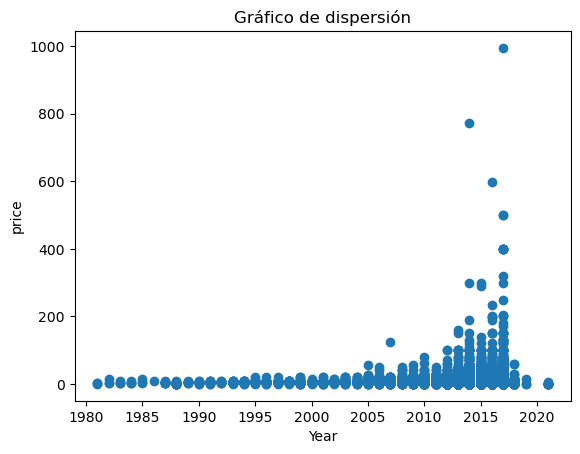

In [ ]:
plt.scatter(df['Year'], df['price'])
plt.xlabel('Year')
plt.ylabel('price')
plt.title('Gráfico de dispersión')
plt.show()

**Gráfico de barras para variables categóricas**

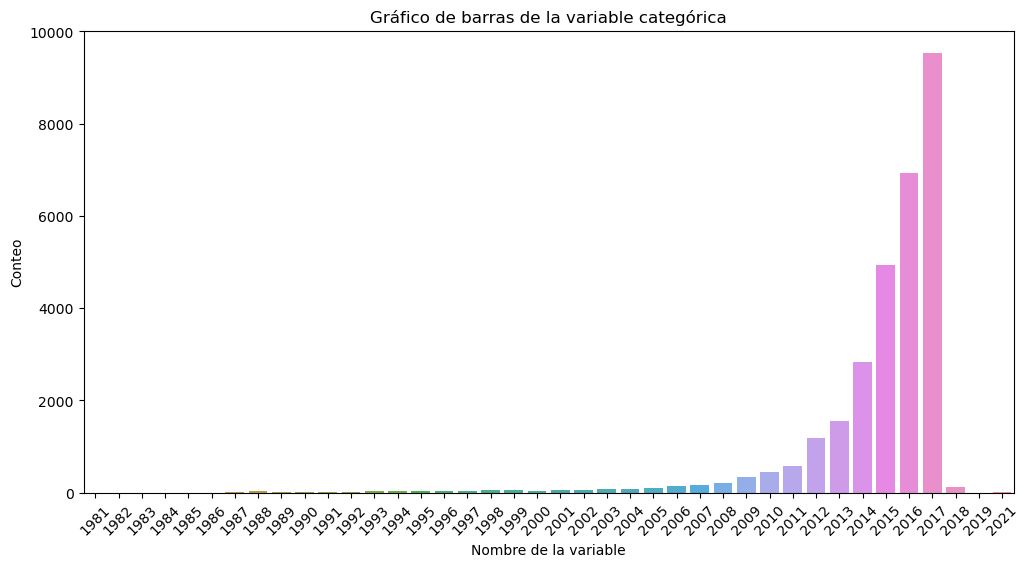

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Year', data = df)
plt.xlabel('Nombre de la variable')
plt.ylabel('Conteo')
plt.title('Gráfico de barras de la variable categórica')
plt.xticks(rotation = 45)
plt.show()

**Gráfico de caja y bigotes Boxplot**

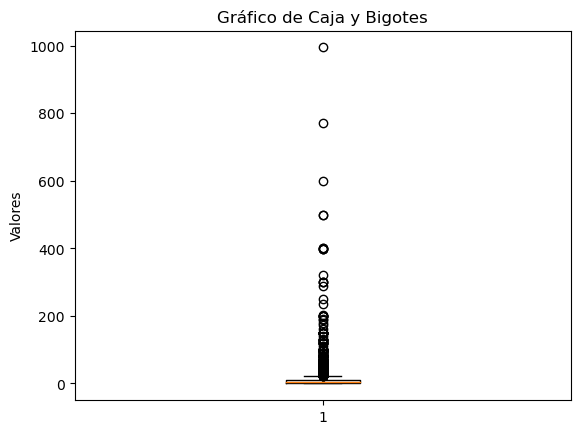

In [ ]:
plt.boxplot(df.price)
plt.ylabel('Valores')
plt.title('Gráfico de Caja y Bigotes')
plt.show()

Relaciones De Variables

- Matriz de correlacion.

C:\Users\Pierinna\AppData\Local\Temp\ipykernel_7340\2202312010.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


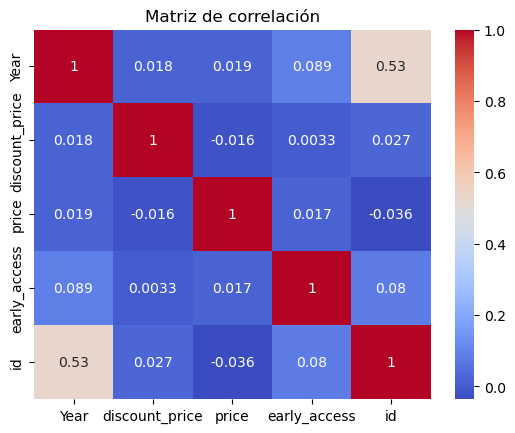

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

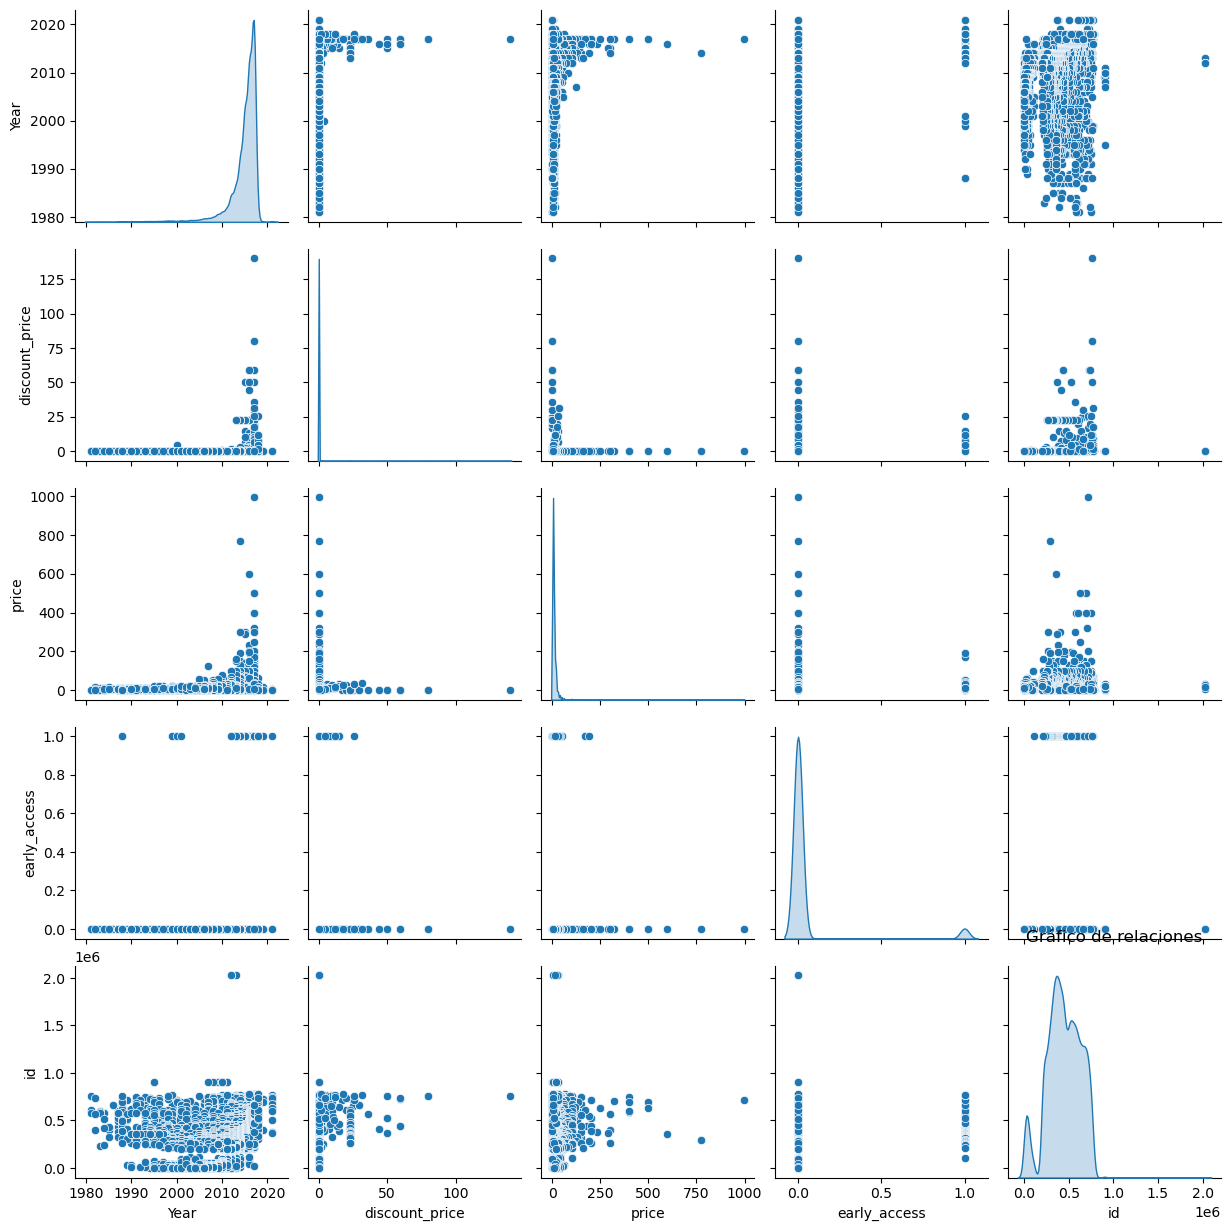

In [ ]:
sns.pairplot(df, diag_kind = "kde")
plt.title('Gráfico de relaciones')
plt.show()

**MODELO DE PREDICCION**

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

In [ ]:
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]